In [ ]:
Christopher Jacob Ahumada Robles    02/12

# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

 $$ y \geq 3x + 4 $$

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  **El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g**

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución



In [ ]:
1.- Criterio de optimizacion: 
    -Minimizar costro de producto final 
    -

In [20]:
import sympy as sp
import numpy as np
B=sp.var("B")
A=sp.var("A")
def f(A, b):
    return 0.6*A+0.2*B
f(A, B)

y=(((25-0.3*A)/0.05)-(30-0.1*A)/0.1)
g=(((6-0.01*A)/0.07)-(30-0.1*A)/0.1)
resultado=sp.solve(y, A)[0]
resultado2=sp.solve(g, A)[0]
resultado.subs(A, 40)
resultado, resultado2
y_1=resultado.subs(A,40)
y_1

40.0000000000000

In [4]:
restriccion_prote=0.3*A+0.05*B>=25
restriccion_grasa=0.01*A+0.07*B>=6
restriccion_azucar=0.10*A+0.10*B>=30

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

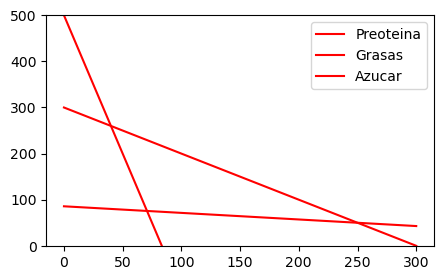

In [23]:
import sympy as sp
x=sp.var("x")
x_1=sp.solve(r1(x)-r3(x),x)[0]
x_1, r1(x_1)

(40.0000000000000, 260.000000000000)

In [25]:
x=sp.var("x")
x_2=sp.solve(r2(x)-r3(x),x)[0]
x_2, r2(x_2)

(250.000000000000, 50.0000000000000)

In [27]:
def costo(a,b):
    return 0.6*a+0.2*b

costo(40,260)

76.0

In [28]:
costo(250, 50)

160.0

Solución gráfica:

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

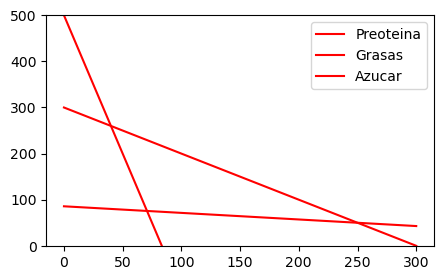

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
def r1(xA):
    return (25 - 0.3*xA)/0.05
def r2(xA):
    return (6 - 0.01*xA)/0.07
def r3(xA):
    return (30 - 0.1*xA)/0.10
xA=np.linspace(0,300,2)
plt.figure(figsize=(5,3))
plt.plot(xA, r1(xA), "r", label="Preoteina")
plt.plot(xA, r2(xA), "r", label="Grasas")
plt.plot(xA, r3(xA), "r", label="Azucar")
plt.legend(loc="best")
plt.ylim([-1,500])
plt.grid

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

- A = 7 DIAS CAMION, 2 DIAS CARRO

- B = 3 DIAS CAMION, 3 DIAS CARRO

- A<=300,   B<=270

- GANANCIAS CAMION = 600    CARRO = 200

- Criterio: Maximizar ganancias


max 600x_c+200x_c

A  $7x_c+2x_a<=300$

B  $3x_c+3x_a<=270$



**Solucion**
Definimos $x_c$ como la cantidad de carrocerias de camion y $x_a$ como la cantidad de carrocerias de automovil 

Se desea maximizar $600x_c+200x_a$ bajo las restricciones de tiempo 


In [28]:
import scipy.optimize as opt
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



# 1 Criterio de optimizacion: optimizar ganancias

# 2 Variables: 
$(A_c, A_a) Y (B_c, B_a)$

# 3 Funcion de utilidad 
$600A_c+600B_c+200A_a+200B_a$

# Restricciones:

$$ 7A_c+2A_a<=300 $$
$$ 3B_c+2B_a<=270 $$

# Vectorizar 



In [32]:
c=np.array([-600,
            -600,
            -200, 
            -200])

Aub = ([[7, 0, 2, 0],
        [0, 3, 0, 3]])

Bub = ([[300],
        [270]])

#Resolver
opt.linprog(c, Aub, bub)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -130000.0
              x: [ 0.000e+00  1.333e+02  2.500e+02  0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  1.333e+02  2.500e+02  0.000e+00]
                 marginals: [ 1.000e+02  0.000e+00  0.000e+00  4.000e+02]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+02 -2.000e+02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

{x: 66, y: 24}

90.0

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [2]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [14]:
opt.linprog?

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**


# 1 Criterio de optimizacion: Maximizar utilidad

# 2 Variables: 
$(a, c)$

# 3 Funcion de utilidad 
$15a+20c$

# Restricciones:

$$ 0.5a+1c<=10 $$
$$ a+c<=15 $$

# Vectorizar 

$ c^T x = 15 a + 20 c $

In [34]:
c = np.array([-15,
              -20])
Aub = np.array([
    [0.5, 1.0],
    [1.0, 1.0]
])
bub = np.array([10,
                15])
opt.linprog(c,Aub,bub)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -250.0
              x: [ 1.000e+01  5.000e+00]
            nit: 2
          lower:  residual: [ 1.000e+01  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+01 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos fábricas A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_{AC} + x_{AD} + x_{AE} \leq 500$
- $x_{BC} + x_{BD} + x_{BE} \leq 400$

Restricciones del consumo:

- $x_{AC} + x_{BC} \geq 200$
- $x_{AD} + x_{BD} \geq 300$
- $x_{AE} + x_{BE} \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_{AC} + 60x_{AD} + 10x_{AE} + 25x_{BC} + 40x_{BD} + 20x_{BE}$$

Resolver con `linprog`

In [20]:
#1.- Criterio de optimizacion = minimizar costos

#2.- Variables

import sympy as sp
import numpy as np
import matplotlib.pyplot as plot
import scipy.optimize as opt

c=np.array([50,
            25,
            60,
            40,
            10,
            20])

Aub = np.array([[1,0,1,0,1,0],
                [0,1,0,1,0,1]])

bub = np.array([500,
                400])

Aeq = np.array([[1,1,0,0,0,0],
                [0,0,1,1,0,0],
                [0,0,0,0,1,1]])
                
beq = ([200,
        300,
        400])



In [22]:
sol = opt.linprog(c, Aub, bub, Aeq, beq)
type(sol)

scipy.optimize._optimize.OptimizeResult

In [23]:
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 23000.0
              x: [ 0.000e+00  2.000e+02  1.000e+02  2.000e+02  4.000e+02
                   0.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  2.000e+02  1.000e+02  2.000e+02
                              4.000e+02  0.000e+00]
                 marginals: [ 5.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  3.000e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 4.500e+01  6.000e+01  1.000e+01]
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -2.000e+01]
 

## 5. Optimización de inversión en bonos

**Referencia:**

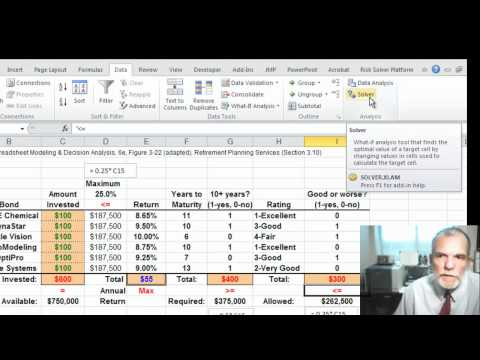

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.